In [1]:
%%capture output
%run ~/ligo-surf-18/ECCENTRIC_POWER_DISTRIBUTIONS/SPECTROGRAM_POWERDIST_FUNCTIONS.ipynb

In [2]:
import gwpy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# For plots: tick mark size = 8 pt
rc('xtick', labelsize=8) 
rc('ytick', labelsize=8)

In [4]:
# Function to generate waveform 
def genWaveform(e0, m1, m2, theta): 
    
    hp, hc = get_td_waveform(approximant="EccentricTD",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1.0/4096,
                         eccentricity=e0,
                         inclination = theta,
                         f_lower=20, 
                         distance=100)
    return hp, hc

In [5]:
# Function to generate spectrogram
def genSpec(hp,hc,fftlen):
    
    #ts = -1*(hp.sample_times[-1]-hp.sample_times)
    
    hplus = TimeSeries(hp, times=hp.sample_times)
    hcross = TimeSeries(hc, times=hc.sample_times)
    
    specgram_p = hplus.spectrogram(fftlen, fftlength=fftlen, overlap=fftlen/2.0)
    specgram_c = hcross.spectrogram(fftlen, fftlength=fftlen, overlap=fftlen/2.0)
    
    specgram = specgram_p + specgram_c
    
    return specgram

In [6]:
def cbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

## Figure 1

In [7]:
# ---- FIG 1 ----

e0 = [1e-10, 0.1, 0.3, 0.5]
m = 5
theta = 0 

hplus = []
hcross = []
specs = []

for e in e0: 
    
    # Generate waveform 
    hp, hc = genWaveform(e,m,m,theta)
    hplus.append(hp)
    hcross.append(hc)
    
    # Generate spectrogram 
    fftlen = hp.duration/20.0
    print fftlen
    specs.append(genSpec(hp,hc,fftlen))

0.961962890625
0.924633789063
0.664587402344
0.31357421875


In [8]:
def getxlabels(times, num): 
    
    length = len(times)
    nums = np.arange(0,num+1)

    labels = []
    
    for n in nums:
        idx = n*(length-1)/num
        labels.append(str(np.round(-1.0*times[idx],2)))
        
    #print labels     
    return labels 

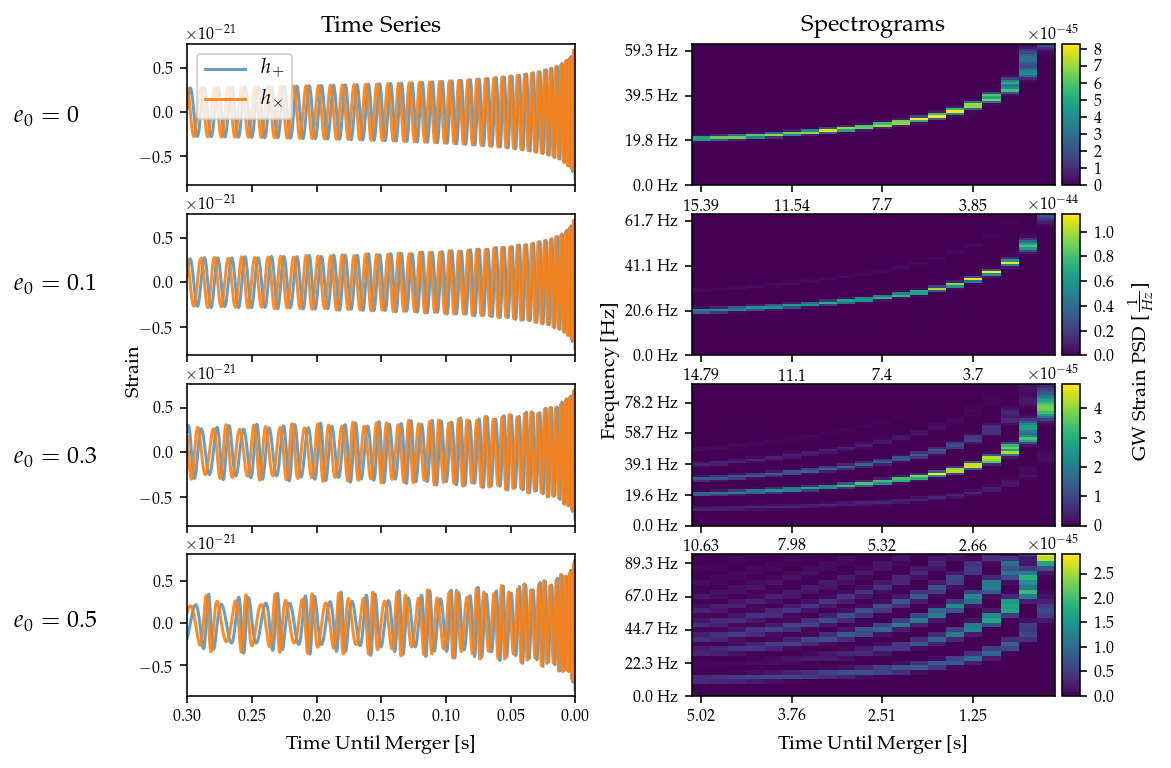

In [33]:
fig1 = plt.figure(figsize=(8,6))

# -- TIME SERIES --

ax1 = fig1.add_subplot(421)
ax1.plot(hcross[0].sample_times, hcross[0], label=r'$h_+$', alpha=0.7)
ax1.plot(hplus[0].sample_times, hplus[0], label=r'$h_\times$', alpha=0.9)
ax1.set_xticklabels([])
ax1.set_xlim(-0.3,0)
ax1.legend(fontsize=10, loc=2)
ax1.set_title("Time Series", fontsize=12)

ax2 = fig1.add_subplot(423)
ax2.plot(hcross[1].sample_times, hcross[1], alpha=0.7)
ax2.plot(hplus[1].sample_times, hplus[1], alpha=0.9)
ax2.set_xticklabels([])
ax2.set_xlim(-0.3,0)

ax3 = fig1.add_subplot(425)
ax3.plot(hcross[2].sample_times, hcross[2], alpha=0.7)
ax3.plot(hplus[2].sample_times, hplus[2], alpha=0.9)
ax3.set_xticklabels([])
ax3.set_xlim(-0.3,0)

ax4 = fig1.add_subplot(427)
ax4.plot(hcross[3].sample_times, hcross[3], alpha=0.7)
ax4.plot(hplus[3].sample_times, hplus[3], alpha=0.9)
ax4.set_xlim(-0.3,0)
ax4.set_xlabel('Time Until Merger [s]', fontsize=10)
ax4.set_xticklabels(['0.30', '0.25', '0.20', '0.15', '0.10', '0.05', '0.00'])


# -- SPECTROGRAMS --

ax5 = fig1.add_subplot(422)
s1 = np.transpose(np.asarray(specs[0]))
spec1 = ax5.imshow(s1, aspect='auto')
y_positions1, y_labels1 = axis_labels(specs[0].frequencies, 100)
ax5.set_yticks(y_positions1)
ax5.set_yticklabels(y_labels1)
ax5.set_ylim([0,60])
ax5.set_xticklabels(getxlabels(hplus[0].sample_times,5))
ax5.set_title("Spectrograms", fontsize=12)

ax6 = fig1.add_subplot(424)
s2 = np.transpose(np.asarray(specs[1]))
spec2 = ax6.imshow(s2, aspect='auto')
y_positions2, y_labels2 = axis_labels(specs[1].frequencies, 100)
ax6.set_yticks(y_positions2)
ax6.set_yticklabels(y_labels2)
ax6.set_ylim([0,60])
ax6.set_xticklabels(getxlabels(hplus[1].sample_times,5))

ax7 = fig1.add_subplot(426)
s3 = np.transpose(np.asarray(specs[2]))
spec3 = ax7.imshow(s3, aspect='auto')
y_positions3, y_labels3 = axis_labels(specs[2].frequencies, 100)
ax7.set_yticks(y_positions3)
ax7.set_yticklabels(y_labels3)
ax7.set_ylim([0,60])
ax7.set_xticklabels(getxlabels(hplus[2].sample_times,5))

ax8 = fig1.add_subplot(428)
s4 = np.transpose(np.asarray(specs[3]))
spec4 = ax8.imshow(s4, aspect='auto')
y_positions4, y_labels4 = axis_labels(specs[3].frequencies, 90)
ax8.set_yticks(y_positions4)
ax8.set_yticklabels(y_labels4)
ax8.set_ylim([0,30])
ax8.set_xticklabels(getxlabels(hplus[3].sample_times,5))
ax8.set_xlabel('Time Until Merger [s]', fontsize=10)

# Formatting stuff
fig1.subplots_adjust(wspace=0.3)
fig1.text(0.07, 0.5, 'Strain', va='center', rotation='vertical')
fig1.text(0.483, 0.5, 'Frequency [Hz]', va='center', rotation='vertical')
fig1.text(0.945, 0.5, r'GW Strain PSD [$\frac{1}{Hz}$]', va='center', rotation='vertical')
fig1.text(-0.025, 0.785, r'$e_0 = 0$', fontsize=12)
fig1.text(-0.025, 0.59, r'$e_0 = 0.1$', fontsize=12)
fig1.text(-0.025, 0.39, r'$e_0 = 0.3$', fontsize=12)
fig1.text(-0.025, 0.2, r'$e_0 = 0.5$', fontsize=12)
cbar(spec1)
cbar(spec2)
cbar(spec3)
cbar(spec4)

plt.savefig('waveforms_and_specs.pdf',bbox_inches='tight')

## Figure 3

In [44]:
# ---- FIG 3 ---- 
ecc = [0.3, 0.5, 0.7]
theta = [0, np.pi/4.0, np.pi/2]
nMax = 12

dists = []

for e in ecc:
    
    # diff angles
    for th in theta: 
        nArray, d = powerDist(nMax,e,th)
        dists.append(d)
    
    # cumulative power 
    nArray, summed_d = summedPowerDist(nMax,e)
    dists.append(summed_d)

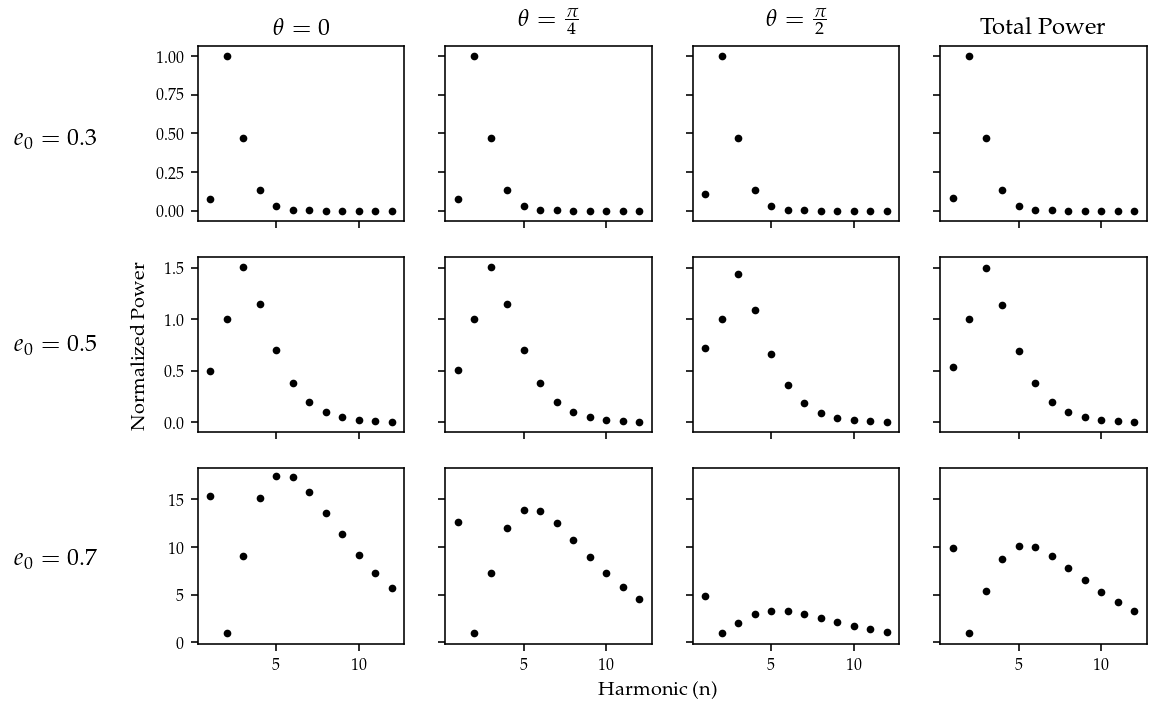

In [45]:
fig3, axes = plt.subplots(nrows=3, ncols=4, figsize=(8.5,5.5), sharex=True, sharey='row')

rows=[0,1,2]
cols=[0,1,2,3]

count = 0

for r in rows: 
    for c in cols: 
        axes[r, c].scatter(nArray,dists[count], c='k', s=8)
        count = count + 1
        
axes[0, 0].set_title(r'$\theta = 0$',fontsize=12)
axes[0, 1].set_title(r'$\theta = \frac{\pi}{4}$',fontsize=12)
axes[0, 2].set_title(r'$\theta = \frac{\pi}{2}$',fontsize=12)
axes[0, 3].set_title('Total Power',fontsize=12)

fig3.text(0.5, 0.06, 'Harmonic (n)', ha='center')
fig3.text(0.07, 0.5, 'Normalized Power', va='center', rotation='vertical')

fig3.text(-0.025, 0.75, r'$e_0 = 0.3$', fontsize=12)
fig3.text(-0.025, 0.49, r'$e_0 = 0.5$', fontsize=12)
fig3.text(-0.025, 0.22, r'$e_0 = 0.7$', fontsize=12)

plt.savefig('incl_power_dists.pdf',bbox_inches='tight')

## Figure 4

In [46]:
# ---- FIG 4 ----

# Input parameters 
e_inj = np.arange(0.05,0.88,0.02)
theta_inj = np.arange(0,np.pi/2,0.1)

nMax=15
returnAll = False 

# Arrays for results: 
e_inj_arr = []
e_recov_arr = []
theta_arr = []

In [47]:
for e0 in e_inj: 
    for theta in theta_inj: 
        
        # Generate power distribution including inclination angle
        nArr, incl_dist = powerDist(nMax,e0,theta)
        
        # Curve fitting without inclination angle (total radiated power)
        e, covar = curve_fit(gnorm, nArr, incl_dist, p0=0.01)
        e_fit = e[0]
        
        print "Finished job for e={} and theta={}".format(e0,theta)
        
        e_inj_arr.append(e0)
        e_recov_arr.append(e_fit)
        theta_arr.append(theta)

Finished job for e=0.05 and theta=0.0
Finished job for e=0.05 and theta=0.1
Finished job for e=0.05 and theta=0.2
Finished job for e=0.05 and theta=0.3
Finished job for e=0.05 and theta=0.4
Finished job for e=0.05 and theta=0.5
Finished job for e=0.05 and theta=0.6
Finished job for e=0.05 and theta=0.7
Finished job for e=0.05 and theta=0.8
Finished job for e=0.05 and theta=0.9
Finished job for e=0.05 and theta=1.0
Finished job for e=0.05 and theta=1.1
Finished job for e=0.05 and theta=1.2
Finished job for e=0.05 and theta=1.3
Finished job for e=0.05 and theta=1.4
Finished job for e=0.05 and theta=1.5
Finished job for e=0.07 and theta=0.0
Finished job for e=0.07 and theta=0.1
Finished job for e=0.07 and theta=0.2
Finished job for e=0.07 and theta=0.3
Finished job for e=0.07 and theta=0.4
Finished job for e=0.07 and theta=0.5
Finished job for e=0.07 and theta=0.6
Finished job for e=0.07 and theta=0.7
Finished job for e=0.07 and theta=0.8
Finished job for e=0.07 and theta=0.9
Finished job

/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Finished job for e=0.15 and theta=0.2
Finished job for e=0.15 and theta=0.3
Finished job for e=0.15 and theta=0.4
Finished job for e=0.15 and theta=0.5
Finished job for e=0.15 and theta=0.6
Finished job for e=0.15 and theta=0.7
Finished job for e=0.15 and theta=0.8
Finished job for e=0.15 and theta=0.9
Finished job for e=0.15 and theta=1.0
Finished job for e=0.15 and theta=1.1
Finished job for e=0.15 and theta=1.2
Finished job for e=0.15 and theta=1.3
Finished job for e=0.15 and theta=1.4
Finished job for e=0.15 and theta=1.5
Finished job for e=0.17 and theta=0.0
Finished job for e=0.17 and theta=0.1
Finished job for e=0.17 and theta=0.2
Finished job for e=0.17 and theta=0.3
Finished job for e=0.17 and theta=0.4
Finished job for e=0.17 and theta=0.5
Finished job for e=0.17 and theta=0.6
Finished job for e=0.17 and theta=0.7
Finished job for e=0.17 and theta=0.8
Finished job for e=0.17 and theta=0.9
Finished job for e=0.17 and theta=1.0
Finished job for e=0.17 and theta=1.1
Finished job

Finished job for e=0.43 and theta=0.5
Finished job for e=0.43 and theta=0.6
Finished job for e=0.43 and theta=0.7
Finished job for e=0.43 and theta=0.8
Finished job for e=0.43 and theta=0.9
Finished job for e=0.43 and theta=1.0
Finished job for e=0.43 and theta=1.1
Finished job for e=0.43 and theta=1.2
Finished job for e=0.43 and theta=1.3
Finished job for e=0.43 and theta=1.4
Finished job for e=0.43 and theta=1.5
Finished job for e=0.45 and theta=0.0
Finished job for e=0.45 and theta=0.1
Finished job for e=0.45 and theta=0.2
Finished job for e=0.45 and theta=0.3
Finished job for e=0.45 and theta=0.4
Finished job for e=0.45 and theta=0.5
Finished job for e=0.45 and theta=0.6
Finished job for e=0.45 and theta=0.7
Finished job for e=0.45 and theta=0.8
Finished job for e=0.45 and theta=0.9
Finished job for e=0.45 and theta=1.0
Finished job for e=0.45 and theta=1.1
Finished job for e=0.45 and theta=1.2
Finished job for e=0.45 and theta=1.3
Finished job for e=0.45 and theta=1.4
Finished job

Finished job for e=0.71 and theta=0.3
Finished job for e=0.71 and theta=0.4
Finished job for e=0.71 and theta=0.5
Finished job for e=0.71 and theta=0.6
Finished job for e=0.71 and theta=0.7
Finished job for e=0.71 and theta=0.8
Finished job for e=0.71 and theta=0.9
Finished job for e=0.71 and theta=1.0
Finished job for e=0.71 and theta=1.1
Finished job for e=0.71 and theta=1.2
Finished job for e=0.71 and theta=1.3
Finished job for e=0.71 and theta=1.4
Finished job for e=0.71 and theta=1.5
Finished job for e=0.73 and theta=0.0
Finished job for e=0.73 and theta=0.1
Finished job for e=0.73 and theta=0.2
Finished job for e=0.73 and theta=0.3
Finished job for e=0.73 and theta=0.4
Finished job for e=0.73 and theta=0.5
Finished job for e=0.73 and theta=0.6
Finished job for e=0.73 and theta=0.7
Finished job for e=0.73 and theta=0.8
Finished job for e=0.73 and theta=0.9
Finished job for e=0.73 and theta=1.0
Finished job for e=0.73 and theta=1.1
Finished job for e=0.73 and theta=1.2
Finished job

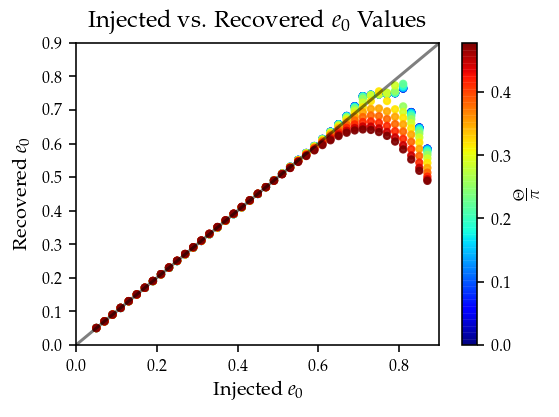

In [48]:
theta_plot = []
for t in theta_arr: 
    theta_plot.append(t/np.pi)

# Plotting 
diag = np.arange(-0.1,1.0,0.1)
plt.figure(figsize=(4,3))
plt.plot(diag, diag, color='k', alpha=0.5)
plt.scatter(e_inj_arr, e_recov_arr, c=theta_plot, cmap='jet', s=10, alpha=0.9)
plt.title(r"Injected vs. Recovered $e_0$ Values", fontsize=12)
plt.xlabel(r"Injected $e_0$", fontsize=10)
plt.ylabel(r"Recovered $e_0$", fontsize=10)
cb = plt.colorbar()
cb.set_label(label=r'$\frac{\Theta}{\pi}$',fontsize=10)
plt.xlim(0, 0.9)
plt.ylim(0,0.9)
plt.tight_layout()
plt.savefig('incl_inj_vs_rec.pdf',bbox_inches='tight')

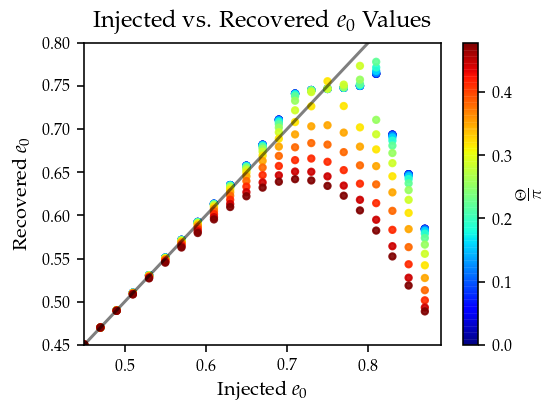

In [49]:
# Plotting, zoomed in 
diag = np.arange(-0.1,1.0,0.1)
plt.figure(figsize=(4,3))
plt.plot(diag, diag, color='k', alpha=0.5)
plt.scatter(e_inj_arr, e_recov_arr, c=theta_plot, cmap='jet', s=10, alpha=0.9)
plt.title(r"Injected vs. Recovered $e_0$ Values", fontsize=12)
plt.xlabel(r"Injected $e_0$", fontsize=10)
plt.ylabel(r"Recovered $e_0$", fontsize=10)
cb = plt.colorbar()
cb.set_label(label=r'$\frac{\Theta}{\pi}$',fontsize=10)
plt.xlim(0.45, 0.89)
plt.ylim(0.45,0.8)
plt.tight_layout()
plt.savefig('incl_inj_vs_rec_zoomedin.pdf',bbox_inches='tight')